In [3]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from yellowbrick.target import FeatureCorrelation

In [4]:
df= pd.read_csv('/Users/josephlim/Desktop/Data Science/Capstone Projects/Music Recommendation System- Capstone 3/Data/df_content_cleaned.csv')

In [5]:
df.shape

(586601, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586601 entries, 0 to 586600
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  int64  
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          58

In [7]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [8]:
df= df.rename(columns={'release_date':'year'})

### Feature Correlation

 Before we go into an in-depth analysis, let's explore correlations between features.

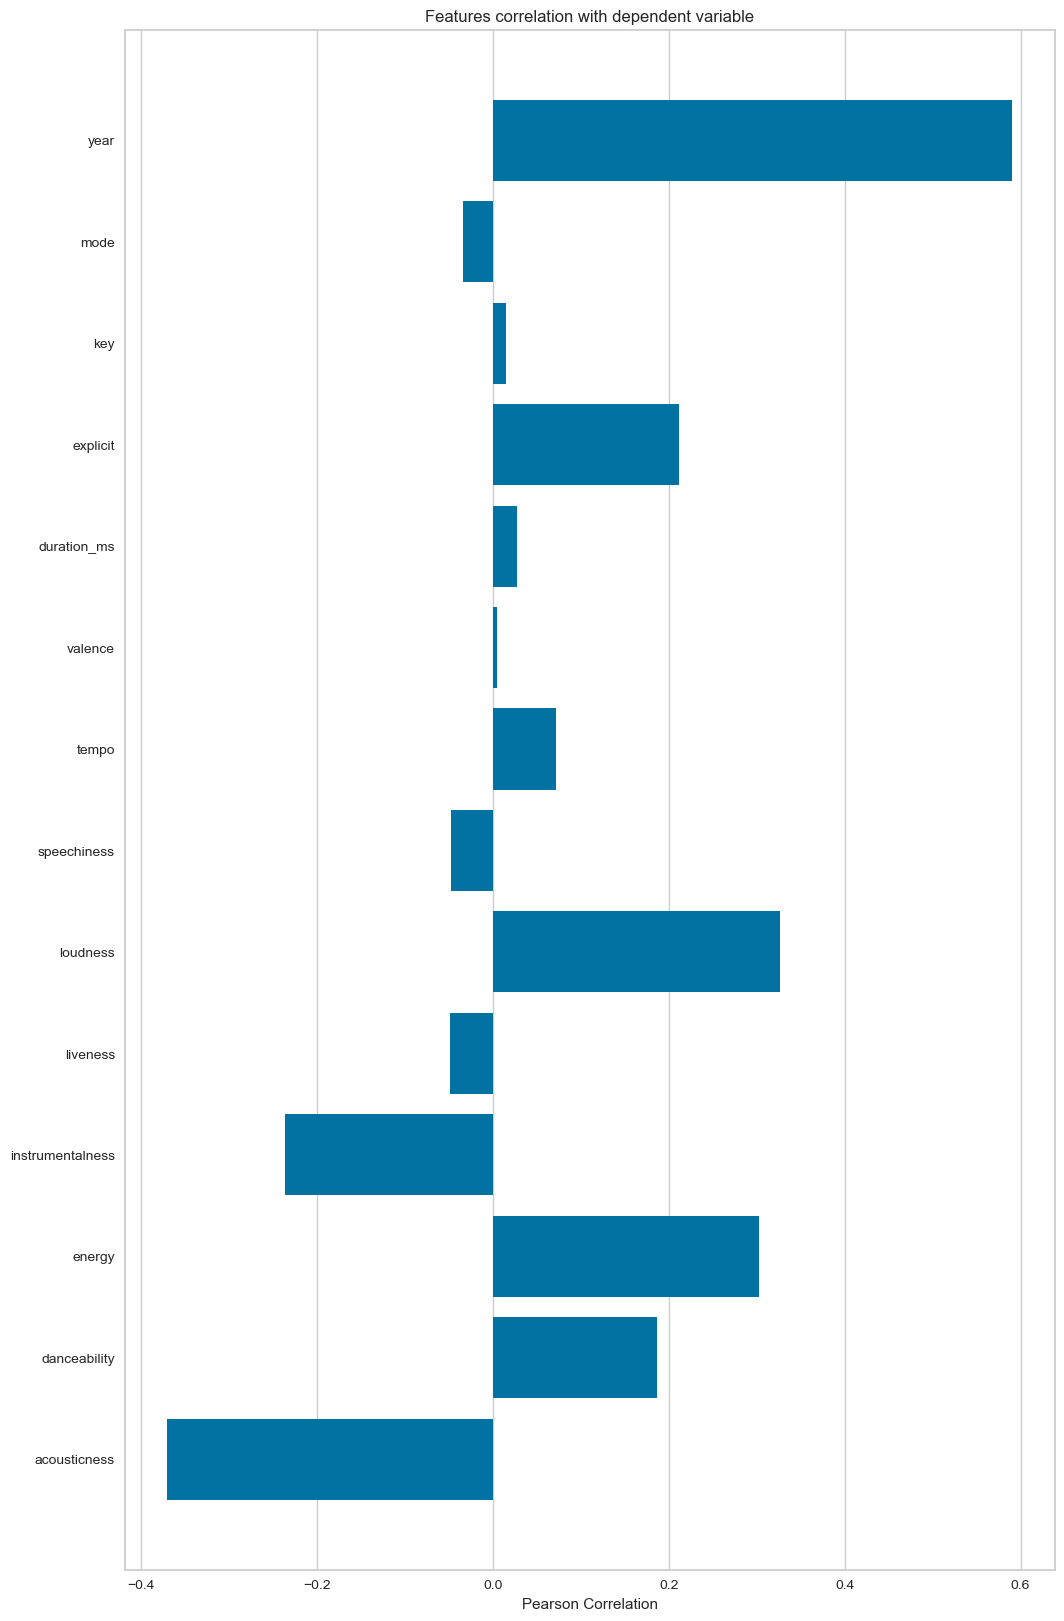

<AxesSubplot: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [9]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X= df[feature_names]
y= df['popularity']

features= np.array(X.columns)
visualizer= FeatureCorrelation(labels= features)

plt.rcParams['figure.figsize']=(12, 20)
visualizer.fit(X, y)
visualizer.show()

<AxesSubplot: title={'center': 'Number of Songs Throughout Time'}, xlabel='decade', ylabel='count'>

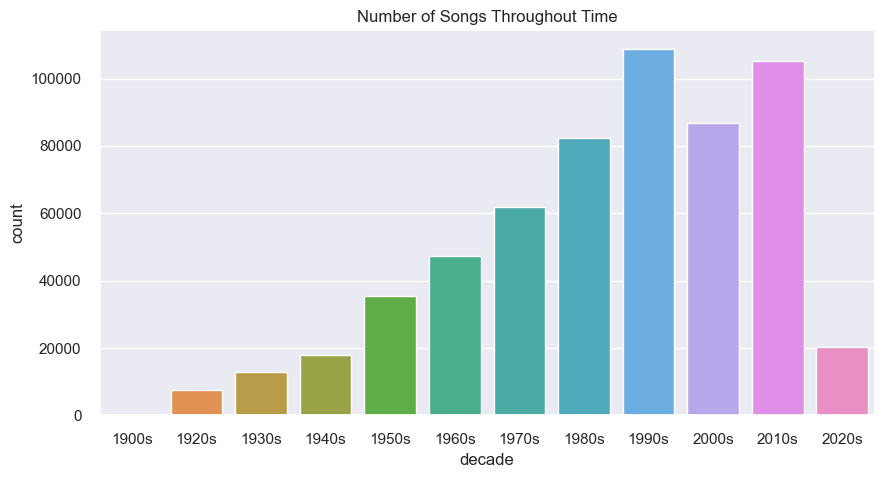

In [16]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['year'].apply(get_decade)
df_sort= df.sort_values('decade')

plt.title('Number of Songs Throughout Time')

sns.set(rc={'figure.figsize':(10 ,5)})
sns.countplot(data= df_sort, x='decade')

We can see that number of top-charting songs increase logarithmically until 1990s. We then have slight drop in them around 2000s, followed by a slight recovery in 2010s. Very few songs in 2020s, but this makes sense, given that we're still in early 2020s. Let's see how different audio features change throughout the years.

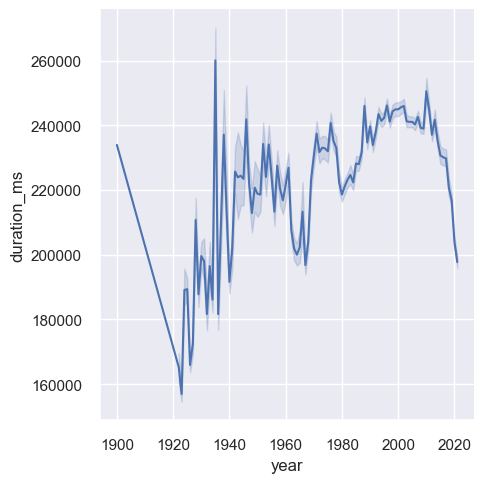

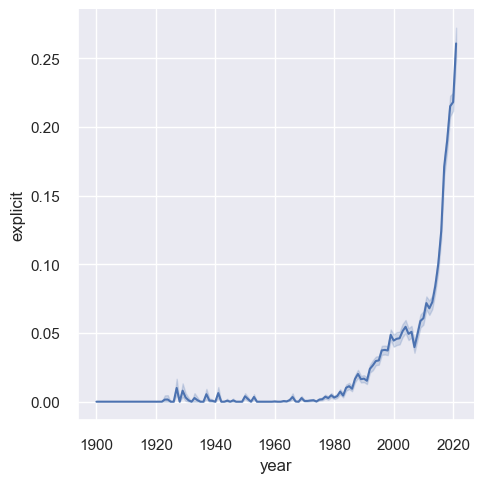

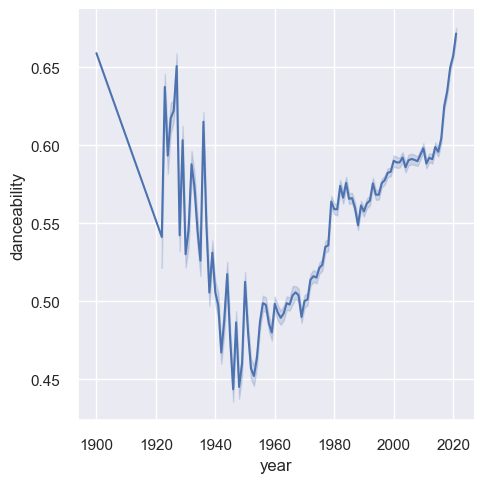

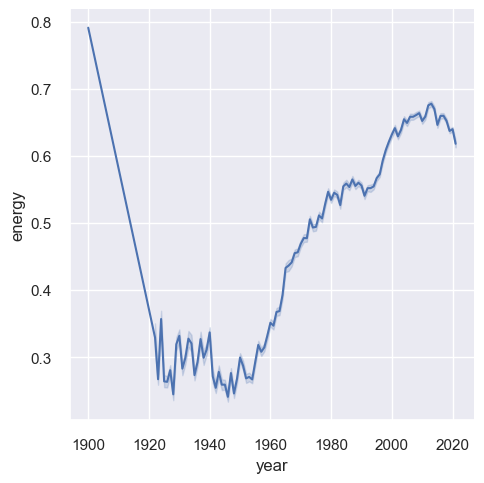

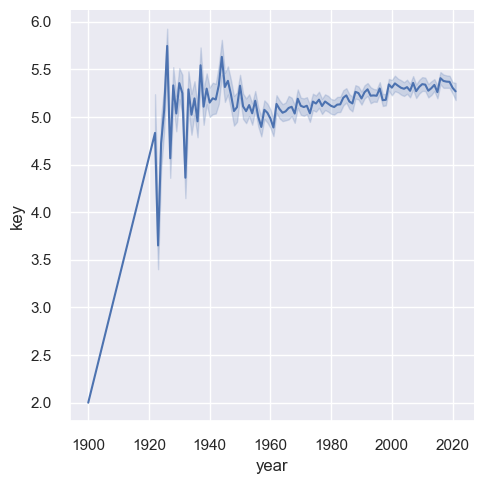

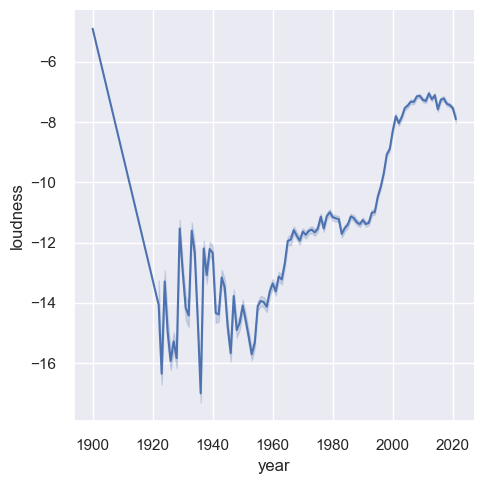

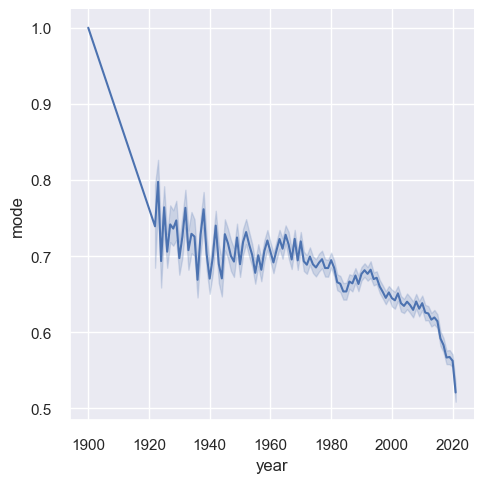

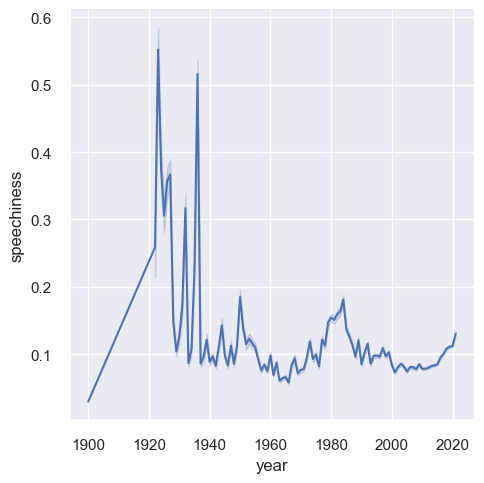

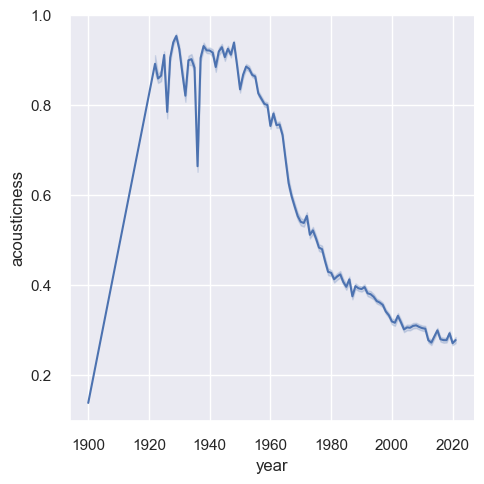

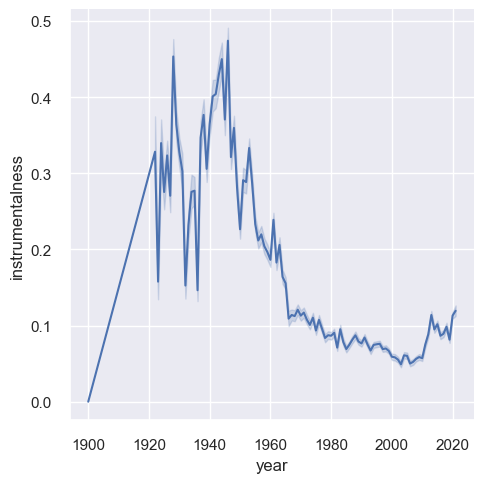

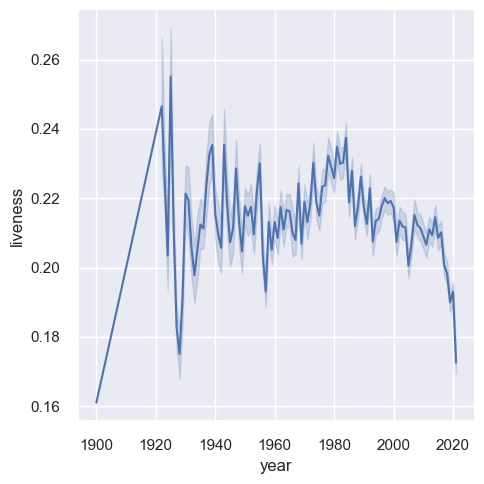

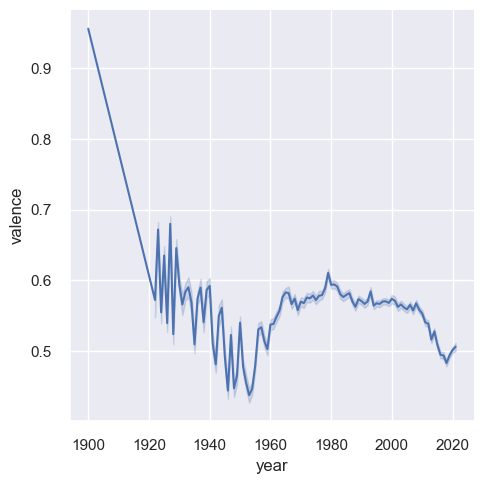

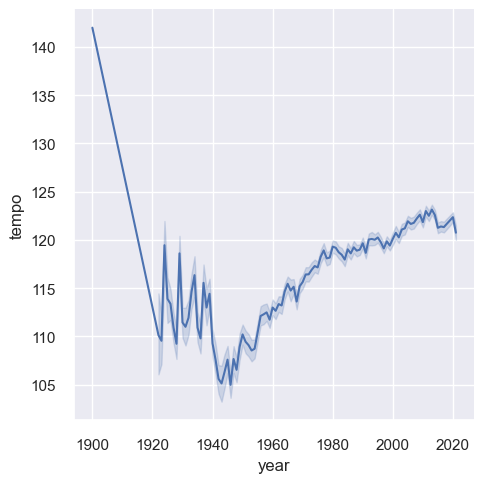

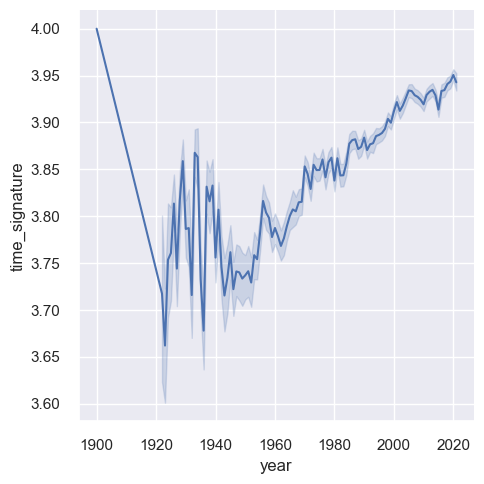

In [18]:
obj= df.select_dtypes('object').copy().columns.tolist()
obj.extend(['year','popularity'])
audio_features= df.drop(obj, axis=1).columns.tolist()

for i in audio_features:
    sns.relplot(data=df, x='year', y= i, kind= 'line')